<a href="https://colab.research.google.com/github/mohammadzavvari/self-supervised-learning-project/blob/main/SSL_Project_persian.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<div id="Overveiw" style="line-height:300%;" dir='rtl'>
	<font face="XB Zar" size=4>
		<font color=#004883 size=5>
    چکیده
        </font>
        <hr>
        در این پروژه قصد داریم که با چند روش مختلف self-supervised learning (که از این به بعد SSL می‌نامیم)
یک سری مدل را train کنیم و پس از آن، میزان عملکرد این مدل‌ها را با مدلی که در حالت عادی برای دسته‌بندی آموزش دیده باشد را مقایسه کنیم.
        <br>
        برای این پروژه از دیتاست معتبر
       <a href=""> Tiny ImageNet </a> 
         استفاده می‌کنیم که در آدرس 
        <a href="http://cs231n.stanford.edu/tiny-imagenet-200.zip"> Tiny ImageNet </a>
            قابل دانلود است.
          <br>
          بخش‌های مختلف گزارش به ترتیب زیر هستند:
        <ol>
            <li>
                <a href="#Problem">تعریف مسئله</a>
            </li>
            <li>
                <a href="#DataSet">دیتاست</a>
            </li>
            <li>
                <a href="#Base">مدل‌ پایه‌ای که در تمامی بخش‌ها استفاده می‌کنیم</a>
            </li>
            <li>
                <a href="#VanillaClassification"> دسته‌بندی با مدل عادی</a>
            </li>
            <li>
                <a href="#JointEmbeddin">دسته‌بندی با مدل اولیه‌ی  Joint Embedding</a>
            </li>
            <!-- <li>
                <a href="#Training">آموزش مدل</a>
            </li>
            <li>
                <a href="Test">تست مدل</a>
            </li> -->
<!--             <li>
                <ul>
                    <li><a href="#Answer2-1">dark query percent</a></li>
                    <li><a href="#Answer2-2">query bounce rate</a></li>
                </ul>
            </li>
            <li>
                <a href="#Answer3"></a>
            </li>
            <li>
                <a href="#Answer4"></a>
            </li>  -->
        </ol>   
</font>
</div>

<div id="Problem" style="line-height:300%;" dir='rtl'>
	<font face="XB Zar" size=4>
		<font color=#004883 size=5>
    تعریف مسئله
        </font>
        <hr>
        آموزش یک مدل برای یادگیری دسته‌بندی تصاویر معمولا زمان زیادی را می‌گیرد. حال با استفاده از روش‌های مختلف  SSL می‌توانیم دو کار انجام دهیم:
        <br>
        اول اینکه از داده‌های بدون لیبل می‌توانیم استفاده کنیم و این دست ما را در تعداد داده‌ها بسیار باز میگذارد. 
        <br>
        ثانیا مدلمان را می‌توانیم آموزش دهیم تا تفسیر مناسبی از تصاویر داشته باشد و به عبارتی  representation خوبی به ما ارائه دهد.
        <br>
        و در نهایت نیز می‌توانیم از این مدل‌های آموزش داده شده و به عبارتی pre-train 
        شده برای وزن‌های اولیه‌ی تسک‌های دسته‌بندی استفاده کنیم و ببینیم که آیا بهبودی حاصل می‌شود یا خیر.
</div>

<div id="DataSet" style="line-height:300%;" dir='rtl'>
	<font face="XB Zar" size=4>
		<font color=#004883 size=5>
    دیتاست
        </font>
        <hr>
       منبع دیتاست ما در این 
        <a href="http://cs231n.stanford.edu/tiny-imagenet-200.zip"> لینک </a>
        قرار دارد که در درس یادگیری عمیق دانشگاه استنفورد توسعه داده شده است و برای دسترسی عموم قرار داده شده است.
        <br>
        این دیتاست یک بخش کوچکی از دیتاست عظیم ImageNet است.
        <br>
ویژگی‌های این دیتاست عبارتند از:
        <ul>
            <li>
                تعداد دسته‌های تصاویر: ۲۰۰ کلاس
            </li>
            <li>
            ویژگی تصاویر: ۶۴ × ۶۴ پیکسل RGB
            </li>
            <li>
            تعداد تصاویر ترین: ۱۰۰۰۰۰ تصویر که می‌شود ۵۰۰ تصویر به ازای هر کلاس
            </li>
            <li>
            تعداد تصاویر ولیدیشن: ۱۰۰۰۰ تصویر که می‌شود ۵۰ تصویر به ازای هر کلاس
            </li>
            <li>
            تعداد تصاویر تست: ۱۰۰۰۰ تصویر که می‌شود ۵۰ تصویر به ازای هر کلاس
            </li>
        </ul>
       
به این ترتیب ویژگی‌های اصلی این دیتاست را بیان کردیم.
</font>
</div>

<div id="Basic" style="line-height:300%;" dir='rtl'>
	<font face="XB Zar" size=4>
		<font color=#004883 size=5>
        مدل پایه‌
        </font>
        <hr>
        برای مدل پایه، از یک شبکه‌ی عصبی resnet34 استفاده میکنیم که در خروجی یک representation به ما ارائه میدهد که به شکل یک بردار ۵۱۲تایی است.
        (منظورمان آخرین لایه قبل از خروجی آخری resnet است)
        ما این مقادیر ۵۱۲تایی را به عنوان representation تصاویر استفاده میکنیم.
        <br>
        شبکه‌ی resnet34 یک شبکه‌ی عصبی عمیق است که از ارتباطات residual برای جلوگیری از از بین رفتن گرادیان در شبکه‌های عمیق استفاده میکند. از دیگر ویژگی‌های مهم این مدل، استفاده از Batch Normalizaion است.
        در تکه‌کد زیر، خلاصه‌ی ساختار ورودی‌ها و خروجی‌های این شبکه برای یک وروردی 
        ۳×۶۴×۶۴ را می‌بینیم.
        
</font>
</div>

In [37]:
import torch
from torchsummary import summary
from torchvision import models

resnet = models.resnet50().to('cuda')
summary(resnet, (3, 256, 256))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 64, 128, 128]           9,408
       BatchNorm2d-2         [-1, 64, 128, 128]             128
              ReLU-3         [-1, 64, 128, 128]               0
         MaxPool2d-4           [-1, 64, 64, 64]               0
            Conv2d-5           [-1, 64, 64, 64]           4,096
       BatchNorm2d-6           [-1, 64, 64, 64]             128
              ReLU-7           [-1, 64, 64, 64]               0
            Conv2d-8           [-1, 64, 64, 64]          36,864
       BatchNorm2d-9           [-1, 64, 64, 64]             128
             ReLU-10           [-1, 64, 64, 64]               0
           Conv2d-11          [-1, 256, 64, 64]          16,384
      BatchNorm2d-12          [-1, 256, 64, 64]             512
           Conv2d-13          [-1, 256, 64, 64]          16,384
      BatchNorm2d-14          [-1, 256,

<div id="#VanillaClassification" style="line-height:300%;" dir='rtl'>
	<font face="XB Zar" size=4>
		<font color=#004883 size=5>
مدل دسته‌بندی عادی‌
        </font>
        <hr>
        در این مدل، پس از یک شبکه‌‌ی resnet34، شبکه‌ی Fully Connected قرار میدهیم که ۲۰۰ تا خروجی دارد.
        در زیر، به سراغ کد‌های مربوط به این بخش می‌رویم:
</font>
</div>


In [1]:
# Import the packages which we will need in the project:
import numpy as np
import os
from random import randint

import torch
import torchvision
from torch import nn
from torch.utils.data import DataLoader, TensorDataset, Dataset
from torchvision import transforms
from PIL import Image
from torchvision import transforms as T

from torchsummary import summary
from torchvision import models

from matplotlib import pyplot as plt

from tqdm.notebook import tqdm

In [2]:
from datetime import datetime

def log_datetime(func):
    '''Log the date and time of a function'''

    def wrapper():
        print(f'Function: {func.__name__}\nRun on: {datetime.today().strftime("%Y-%m-%d %H:%M:%S")}')
        print(f'{"-"*30}')
        func()
        print(f'\nFunction: {func.__name__}\nRun on: {datetime.today().strftime("%Y-%m-%d %H:%M:%S")}')
        print(f'{"-"*30}')
    return wrapper

In [3]:
# Find the device to have opptions when our system has GPU:
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")

In [4]:
# Download the dataset:
!wget http://cs231n.stanford.edu/tiny-imagenet-200.zip
!unzip -qq 'tiny-imagenet-200.zip'

--2022-07-25 09:51:46--  http://cs231n.stanford.edu/tiny-imagenet-200.zip
Resolving cs231n.stanford.edu (cs231n.stanford.edu)... 171.64.68.10
Connecting to cs231n.stanford.edu (cs231n.stanford.edu)|171.64.68.10|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 248100043 (237M) [application/zip]
Saving to: ‘tiny-imagenet-200.zip’

tiny-imagenet-200.z 100%[===================>] 236.61M  86.3MB/s    in 2.7s    

2022-07-25 09:51:49 (86.3 MB/s) - ‘tiny-imagenet-200.zip’ saved [248100043/248100043]



In [5]:
# Define main data directory
data_dir = 'tiny-imagenet-200' 

# Define training and validation data paths
train_dir = os.path.join(data_dir, 'train') 
valid_dir = os.path.join(data_dir, 'val')

print(data_dir)
print(train_dir)
print(valid_dir)

tiny-imagenet-200
tiny-imagenet-200/train
tiny-imagenet-200/val


<div dir='rtl'>
	<font face="XB Zar" size=4>
        <hr>
        باید دقت کنیم که نحوه‌ی ذخیره شدن تصاویر در پوشه‌ی ولیدیشن به شکلی نیست که بتوان از آن در dataloader ای که در pytorch فراهم شده استفاده کرد. فلذا باید ابتدا این موارد را مدیریت کنیم و ساختار را به ساختار قابل استفاده تبدیل کنیم:
        </font>
</div>

In [6]:
# Create separate validation subfolders for the validation images based on
# their labels indicated in the val_annotations txt file
val_img_dir = os.path.join(valid_dir, 'images')

# Open and read val annotations text file
fp = open(os.path.join(valid_dir, 'val_annotations.txt'), 'r')
data = fp.readlines()

# Create dictionary to store img filename (word 0) and corresponding
# label (word 1) for every line in the txt file (as key value pair)
val_img_dict = {}
for line in data:
    words = line.split('\t')
    val_img_dict[words[0]] = words[1]
fp.close()

# Create subfolders (if not present) for validation images based on label,
# and move images into the respective folders
for img, folder in val_img_dict.items():
    newpath = (os.path.join(val_img_dir, folder))
    if not os.path.exists(newpath):
        os.makedirs(newpath)
    if os.path.exists(os.path.join(val_img_dir, img)):
        os.rename(os.path.join(val_img_dir, img), os.path.join(newpath, img))

<div dir='rtl'>
	<font face="XB Zar" size=4>
        <hr>
        حال داده‌ها را لود میکنیم:
        </font>
</div>

In [7]:
def generate_dataloader(data, name, transform, batch_size, shuffle=False):
    if data is None: 
        return None

    if transform is None:
        dataset = torchvision.datasets.ImageFolder(data, transform=T.ToTensor())
    else:
        dataset = torchvision.datasets.ImageFolder(data, transform=transform)

    # Set options for device
    if use_cuda:
        kwargs = {"pin_memory": True, "num_workers": 2}
    else:
        kwargs = {}
    
    # Wrap image dataset (defined above) in dataloader 
    dataloader = DataLoader(dataset, batch_size=batch_size, 
                        shuffle=shuffle, 
                        **kwargs)
    
    return dataloader, dataset 

<div dir='rtl'>
	<font face="XB Zar" size=4>
        <hr>
        در این بخش تغییراتی که هنگام لود کردن و نمایش دادن میخواهیم انجام دهیم را مشخص میکنیم. باید توجه داشته باشیم که بهتر است نرمالیزه کنیم مقادیر عکس‌ها را. این کار را بااستفاده از مقدار‌های میانگین و واریانس داده‌های  ImageNet انجام میدهیم.
        برایکه عملکرد بهتری در خروجی‌ داشته باشیم، سایز تصاویر را هم ۲۵۶.×۲۵۶ قرار میدهیم.
        </font>
</div>

In [8]:
normalize = T.Normalize(mean=[0.485, 0.456, 0.406],
                                 std=[0.229, 0.224, 0.225])

# Inverse transformation: needed for plotting.
unnormalize = T.Normalize(
   mean=[-0.485/0.229, -0.456/0.224, -0.406/0.225],
   std=[1/0.229, 1/0.224, 1/0.225]
)

train_transforms = transforms.Compose([
                                    transforms.Resize((256, 256)),
                                    transforms.ToTensor(),  # convert PIL to Pytorch Tensor
                                    normalize,
                                ])

validation_transforms = transforms.Compose([
                                    transforms.Resize((256, 256)),
                                    transforms.ToTensor(), 
                                    normalize,
                                ])

<div dir='rtl'>
	<font face="XB Zar" size=4>
        <hr>
        حال داده‌ها را لود میکنیم:
        </font>
</div>

In [9]:
# Define batch size for DataLoaders
BATCH_SIZE = 32

# Create DataLoaders for pre-trained models (normalized based on specific requirements)
train_dataloader, train_dataset = generate_dataloader(train_dir, "train", transform=train_transforms, batch_size=BATCH_SIZE)

validation_dataloader, validation_dataset = generate_dataloader(val_img_dir, "val", transform=validation_transforms, batch_size=BATCH_SIZE)

<div dir='rtl'>
	<font face="XB Zar" size=4>
        <hr>
        یک تصویر را به صورت تصادفی رسم میکنیم:
        </font>
</div>

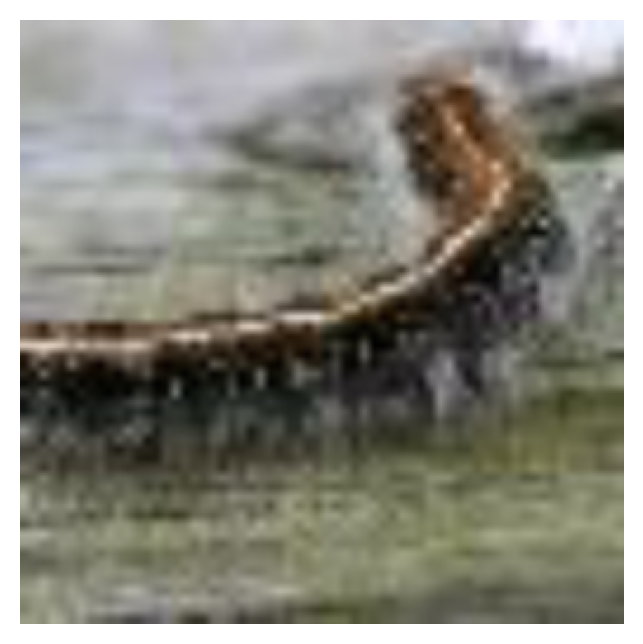

In [10]:
plt.rcParams['figure.dpi'] = 200 

def show_normalized_image(img, title=None):
  plt.imshow(unnormalize(img).detach().cpu().permute(1, 2, 0))
  plt.title(title)
  plt.axis('off')

show_normalized_image(train_dataset[5000][0])

<div dir='rtl'>
	<font face="XB Zar" size=4>
        <hr>
        شبکه‌ی عصبی عادیمان را تعریف میکنیم:
        </font>
</div>

In [11]:
class Vanilla_model(torch.nn.Module):
    def __init__(self, model_name = 'resnet50', pretrained = False):
        super().__init__()

        pre_model = torch.hub.load('pytorch/vision:v0.10.0', model_name, pretrained=pretrained)
        self.main_part = nn.Sequential(*list(pre_model.children())[:-1])
        # self.fc = nn.Linear(in_features=512, out_features=200)
        self.fc1 = nn.Linear(in_features=2048, out_features=1000)
        self.fc2 = nn.Linear(in_features=1000, out_features=200)

    def forward(self, x):
        x = self.main_part(x)
        batch_size = x.size()[0]
        x = x.view(batch_size, -1)
        
        logits = self.fc1(x)
        outputs = self.fc2(logits)
        return outputs, logits

In [ ]:
from torchsummary import summary
summary(model, (3, 256, 256))

<div dir='rtl'>
	<font face="XB Zar" size=4>
        <hr>
        توابع کمکی برای ۵ گام اصلی آموزش دادن  تسک‌های supervised را تعریف میکنیم:
        </font>
</div>

In [ ]:
## place to copy the functions

In [30]:
! mkdir -p '/content/ssl/vanilla'
! mkdir -p '/content/ssl/entire_vanilla'

from google.colab import drive
drive.mount('/content/gdrive')

torch.save(model.state_dict(), '/content/ssl/vanilla/model_epoch_' + '0')
torch.save(model, '/content/ssl/entire_vanilla/model_epoch_' + '0')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


Loading The Model from Google drive:

In [ ]:
## Load the model:
# saved_model_name = 'model_epoch_' + '9'
# model.load_state_dict(torch.load(f'/content/gdrive/My Drive/SSL/ssl/vanilla/model_epoch_9.pt'))


## Check the saved model accuracy:
# accuracies = 0.0
# losses = 0.0

# model.eval()
# with torch.no_grad():
#     for batch in validation_dataloader:
#         loss, correct, logits = get_loss_and_correct(model, batch, criterion, device)
#         total_validation_loss += loss.item()
#         total_validation_correct += correct.item()


<div dir='rtl'>
	<font face="XB Zar" size=4>
        <hr>
        مشخص کردن مقادیر اولیه برای آموزش دادن شبکه‌ی عصبی:
    </font>
</div>

In [31]:
# model.train()

if torch.cuda.is_available():
  model = model.cuda()
  criterion = criterion.cuda()
  device = torch.device("cuda:0")
else:  
  device = torch.device("cpu")

print(f'\n The device is {device}')

train_losses = []
train_accuracies = []
validation_losses = []
validation_accuracies = []


 The device is cuda:0


<div dir='rtl'>
	<font face="XB Zar" size=4>
        <hr>
        ۵ گام اصلی برای آموزش شبکه‌های عصبی در تسک‌های supervised:
        <ol>
        <li>
        Forward Pass
        </li>
        <li>
        Find the loss
        </li>
        <li>
        Make gradient Zero
        </li>
        <li>
        Backpropagation to find the gradients w.r.t the loss
        </li>
        <li>
        Take a step into the direction of Minimizing the loss
        </li>
        </ol> 
    </font>
</div>

Using cache found in /root/.cache/torch/hub/pytorch_vision_v0.10.0
/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:209: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  f"The parameter '{pretrained_param}' is deprecated since 0.13 and will be removed in 0.15, "
/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/3125 [00:00<?, ?it/s]

targets
> <ipython-input-36-0418f4c41d5e>(11)get_loss_and_correct()
-> loss = criterion(outputs, targets)
(Pdb) targets
tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0], device='cuda:0')
(Pdb) loss = criterion(outputs, targets)
(Pdb) loss
tensor(165.0894, device='cuda:0', grad_fn=<NllLossBackward0>)
(Pdb) outs = outputs.detach().argmax(dim=1)
(Pdb) outs.shape
torch.Size([32])
(Pdb) outs
tensor([195, 195, 195, 195, 195, 195, 195, 195, 195, 195, 195,  18, 195, 195,
        195, 195, 195, 195, 195, 195, 195, 195, 195, 195, 195, 195, 195, 195,
        195, 195, 195, 195], device='cuda:0')
(Pdb) outputs[0]
tensor([ 0.1685, -0.1716,  0.3834, -0.2713, -0.6339,  0.4890,  0.3814,  0.4102,
        -0.0060, -0.0112, -0.5229, -0.3645, -0.3667,  0.3694,  0.1263,  0.4317,
        -0.6859, -0.8134,  0.6003, -0.2690, -0.2406,  0.0571,  0.3610, -0.0152,
        -0.0269,  0.4819,  0.0537, -0.1687,  0.1470,  0.1414,  0.3601, -0.1914,
        

BdbQuit: ignored

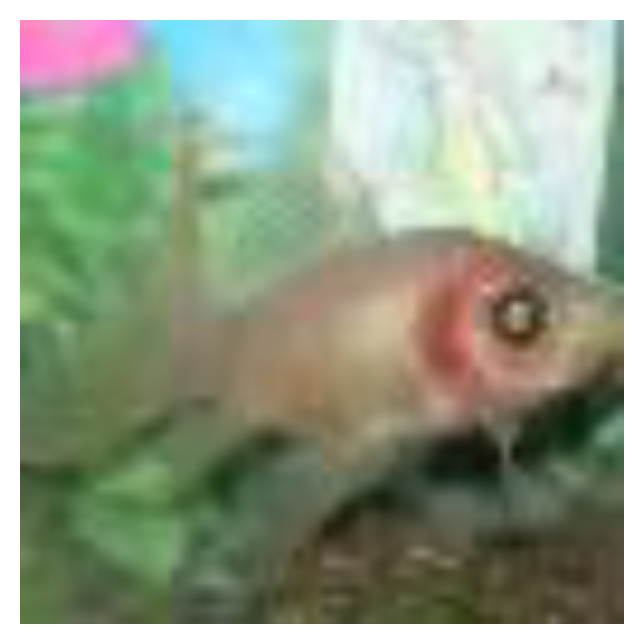

In [36]:
def get_loss_and_correct(model, batch, criterion, device):
  x, targets = batch
#   import pdb; pdb.set_trace()
  x = x.to(device)
  targets = targets.to(device)

  outputs, logits = model(x)
  show_normalized_image(x[0])
  input()
  import pdb; pdb.set_trace()
  loss = criterion(outputs, targets)
  correct = targets.eq(outputs.detach().argmax(dim=1)).float().sum()

  return loss, correct, logits.detach() # Return loss and correct with its graph and the logits without graph

def step(loss, optimizer):
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()
  return

model = Vanilla_model().to(device)

criterion = nn.CrossEntropyLoss(reduction='sum')

optimizer = torch.optim.Adam(params=model.parameters())

N_EPOCHS = 10

pbar = tqdm(range(N_EPOCHS))

for i in pbar:
    # print(f'i is equal to: {i}')
    total_train_loss = 0.0
    total_train_correct = 0.0
    total_validation_loss = 0.0
    total_validation_correct = 0.0

    model.train()

    for batch in tqdm(train_dataloader, leave=False):
    # for batch in train_dataloader:
        loss, correct, logits = get_loss_and_correct(model, batch, criterion, device)
        step(loss, optimizer)
        total_train_loss += loss.item()
        total_train_correct += correct.item()

    model.eval()  
    with torch.no_grad():
        for batch in validation_dataloader:
            loss, correct, logits = get_loss_and_correct(model, batch, criterion, device)
            total_validation_loss += loss.item()
            total_validation_correct += correct.item()

    mean_train_loss = total_train_loss / len(train_dataset)
    train_accuracy = total_train_correct / len(train_dataset)

    mean_validation_loss = total_validation_loss / len(validation_dataset)
    validation_accuracy = total_validation_correct / len(validation_dataset)

    train_losses.append(mean_train_loss)
    validation_losses.append(mean_validation_loss)

    train_accuracies.append(train_accuracy)
    validation_accuracies.append(validation_accuracy)

    torch.save(model.state_dict(), '/content/ssl/vanilla/model_epoch_' + str(i+1))
    torch.save(model, '/content/ssl/entire_vanilla/model_epoch_' + str(i+1))

    pbar.set_postfix({'train_loss': mean_train_loss, 'validation_loss': mean_validation_loss, 'train_accuracy': train_accuracy, 'validation_accuracy': validation_accuracy})

In [ ]:
! cp -R '/content/ssl/' '/content/gdrive/MyDrive/SSL'

<div style="line-height:300%;" dir='rtl'>
	<font face="XB Zar" size=4>
        <hr>
        حال نمودار مربوط به Accuracy‌ها را می‌کشیم تا ایده‌ی بهتری از مدل بدست آوریم.
</font>
</div>

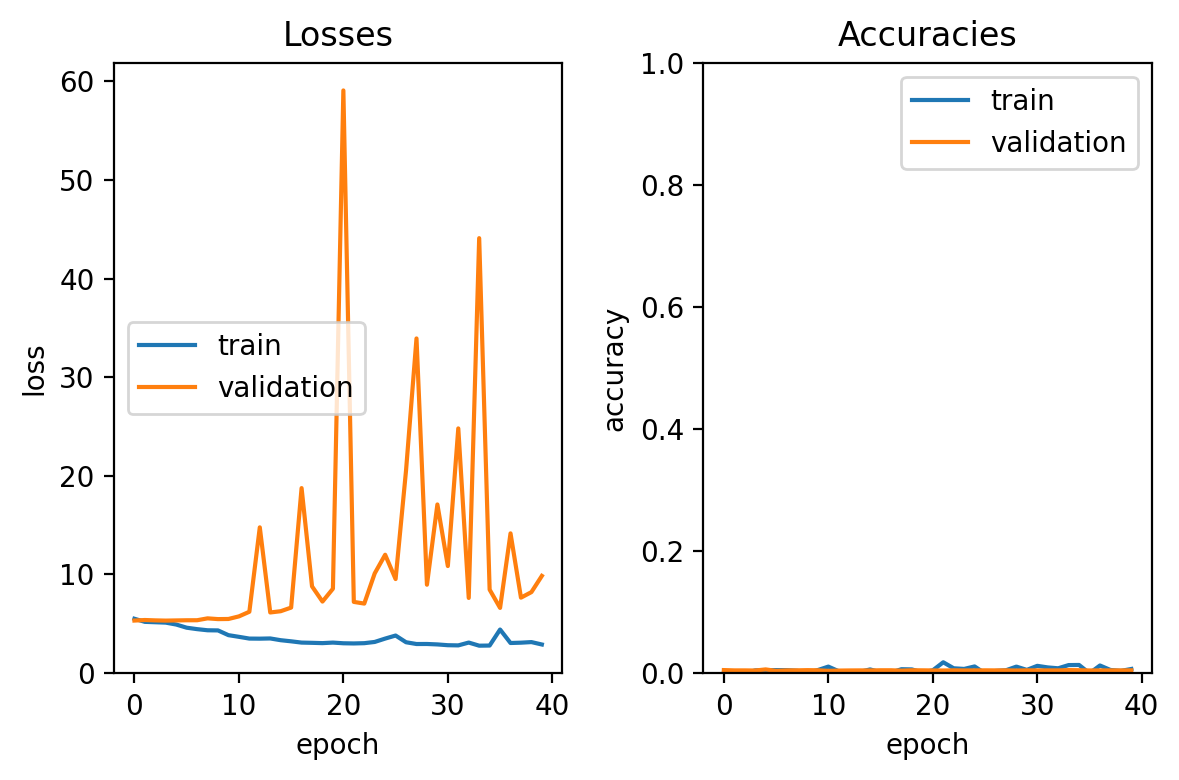

In [ ]:
plt.figure(dpi=200)

plt.subplot(121)
plt.plot(train_losses, label='train')
plt.plot(validation_losses, label='validation')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.title('Losses')
plt.legend()

plt.subplot(122)
plt.plot(train_accuracies, label='train')
plt.plot(validation_accuracies, label='validation')
plt.legend()
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.ylim(0, 1)
plt.title('Accuracies')

plt.tight_layout()

<div id="#JointEmbedding" style="line-height:300%;" dir='rtl'>
	<font face="XB Zar" size=4>
		<font color=#004883 size=5>
        دسته‌بندی با مدل اولیه‌ی Joint Embedding
        </font>
        <hr>
        در این روش، ابتدا  شبکه‌ی resnet34 را در نظر میگیریم.
        سپس یک تصویر و یک شکل خراب شده از همان تصویر را به شبکه میدهیم و فاصله‌‌ی کسینوسی بین representation‌ها را در نظر میگیریم.
        این فاصله را میخواهیم کاهش دهیم.
        سپس یک بار هم یک همان تصویر و یک تصویر رندم را به شبکه میدهیم و در راستای افزایش فاصله‌ی آن‌ها حرکت میکنیم. 
<br>
         در انتها این شبکه‌ی آموزش دیده را به عنوان یک شبکه‌ی اولیه برای آموزش دسته‌بندی استفاده میکنیم و می‌بنیم که در تعداد EPOCHهای یکسان با حالت عادی، آیا تغییری در میزان Accuracy می‌یابیم یا نه. 
</font>
</div>


In [ ]:
# # Transforms to make pictures change
# random_transforms = transforms.Compose([
#                                     T.ToPILImage(),
#                                     T.RandomHorizontalFlip(),
#                                     T.ColorJitter(hue=.1, saturation=.1, contrast=.1),
#                                     T.RandomRotation(20, resample=Image.BILINEAR),
#                                     T.GaussianBlur(7, sigma=(0.1, 1.0)),
#                                     T.ToTensor()
#                                 ])

In [ ]:
# # define the loss for same pictures
# def get_loss_and_logits(model, base_batch, criterion, device, isSame = True, random_batch = None):
#     x, targets = batch
#     x = x.to(device)
#     targets = targets.to(device)

#     if isSame == True:
#         x_bar, targets_bar = random_transforms(batch).detach()
#         x_bar = x_bar.to(device)

#         outputs, logits = model(x)
#         outputs_bar, logits_bar = model(x_bar)
#         loss = criterion(logits, logits_bar)

#     else:
#         x_bar, targets_bar = random_batch
#         x_bar = x_bar.to(device)

#         outputs, logits = model(x)
#         outputs_bar, logits_bar = model(x_bar)
#         loss = -1 * criterion(logits, logits_bar)
    
#     return loss, logits.detach() # Return loss and correct with its graph and the logits without graph


# def step(loss, optimizer):
#   optimizer.zero_grad()
#   loss.backward()
#   optimizer.step()
  return

In [ ]:
# model = Vanilla_model()

# criterion = nn.CosineSimilarity(dim=1, eps=1e-6)

# optimizer = torch.optim.Adam(params=model.parameters())

# N_EPOCHS = 10

In [ ]:
# train_dataloader_random, train_dataset_random = generate_dataloader(train_dir, "train", transform=train_transforms, batch_size=BATCH_SIZE, shuffle=True)

In [ ]:
# pbar = tqdm(range(N_EPOCHS))

# for i in range(N_EPOCHS):
#   total_train_loss = 0.0
#   total_validation_loss = 0.0

#   model.train()

#   batches = zip(train_dataloader, train_dataloader_random)
#   for batches in tqdm(batches, leave=False):
#     #Same pictures:
#     loss, logits = get_loss_and_logits(model, batches[0], criterion, device)
#     step(loss, optimizer)
#     total_train_loss += loss.item()
#     #Different pictures:
#     loss, logits = get_loss_and_logits(model, batches[0], criterion, device, isSame=False, random_batch=batches[1])
#     step(loss, optimizer)

<div dir='rtl'>
	<font face="XB Zar" size=4>
        <hr>
        حال دیگر کافیست که مدلی که بدست آوردیم را دوباره در لوپ مربوط به دسته‌بندی تصاویر قرار دهیم و آن سلول را اجرا کنیم. به این صورت می‌توانیم خروجی را مقایسه کنیم.
        </font>
</div>